# Root Finding and Optimization Methods [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ua-2025q3-astr501-513/ua-2025q3-astr501-513.github.io/blob/main/513/07/notes.ipynb)

In computational physics and astrophysics, many problems reduce to two
fundamental kinds:
1. Root finding:
   Where does a function vanish?
   I.e., solve $f(x) = 0$.
2. Optimization:
   Where does a function reach an extremum (minimum or maximum)?
   I.e., solve $\nabla f(x) = 0$.

These two kind of problems are deeply connected.
Optimization often boils down to root finding on the derivative.
And root finding sometimes requires optimization-like strategies
to accelerate convergence.

Some classic examples of root finding include:
* Solving Kepler's equation $M = E - e \sin E$ to predict planetary
  orbits.
* Finding eigenfrequencies of stellar oscillations by locating roots
  of characteristic equations.

as well as optimization:
* Determining the launch angle of a projectile for maximum range.
* Fitting astrophysical models to observational data by minimizing a
  chi-square error function.
* Training machine learning models for data analysis in astronomy.

In simple cases, closed-form solutions exist (e.g. projectile motion
without air drag).
However, in realistic systems, equations are often nonlinear,
high-dimensional, and analytically unsolvable.
Numerical root finding and optimization methods are the only way to
solve these systems.

## General Framework of Interating Algorithms

Root finding means solving
\begin{align}
  f(x) = 0.
\end{align}
Many algorithms approach this through **iteration**:
starting from an initial guess, we repeatedly update $x$ until the
error is small.

### Fixed-Point Viewpoint

A powerful way to unify root-finding methods is to rewrite the problem
as a fixed-point equation:
\begin{align}
  x = g(x).
\end{align}

Then we can iterate:
\begin{align}
  x_{n+1} = g(x_n).
\end{align}

The solution $x^*$ is a *fixed point* of $g(x)$.
If the update rule is well chosen, the iteration converges to $x^*$.

### Convergence Criterion

Near the fixed point $x^*$, expand $g(x)$ in a Taylor series:
\begin{align}
  x_{n+1} = g(x_n) &\approx g(x^*) + g'(x^*) (x_n - x^*) = x^* + g'(x^*) (x_n - x^*).
\end{align}
Therefore,  
\begin{align}
  \frac{x_{n-1} - x^*}{x_n - x^*} &\approx g'(x^*).
\end{align}

It is clear that,
* If $|g'(x^*)| < 1$, the error shrinks, and the iteration converges.
* If $|g'(x^*)| > 1$, the iteration diverges.
* The closer $|g'(x^*)|$ is to 0, the faster the convergence.

This provides a general way to compare methods.

### Classical Root Finders

As we will soon see, classical root finding methods can be fitted into
this picture.
* Bisection Method:
  Is repeatedly shrinking an interval where the root must lie.
  The update rule is kind of a "double fixed-point scheme" where both
  the upper and lower bounds converge to the root.
  It is guaranteed to converge but only linearly.
* Newton–Raphson Method:
  Corresponds to choosing
  \begin{align}
    g(x) = x - \frac{f(x)}{f'(x)}.
  \end{align}
  If $f'(x^*) \neq 0$, this converges quadratically near the root.
* Secant Method:
  Uses the same Newton update rule, but replaces $f'(x)$ with a finite
  difference.
  This still fits into the fixed-point framework, with a convergence
  rate between bisection and Newton.

Thus, all root-finding methods can be viewed as different choices of
$g(x)$, with a trade-off between robustness and speed.

### Example

Let's solve $f(x)=x^2-2=0$.  
One possible choice of $g(x)$ is
\begin{align}
  g(x) = \tfrac12\left(x + \tfrac{2}{x}\right).
\end{align}
This is the
[ancient Babylonian update](https://www.sciencedirect.com/science/article/pii/S0315086022000477)
for $\sqrt{2}$.

In [1]:
def g(x):
    return (x + 2/x)/2

x = 1.0
for i in range(5):
    print(f"Iteration {i}: x = {x}")
    x = g(x)

Iteration 0: x = 1.0
Iteration 1: x = 1.5
Iteration 2: x = 1.4166666666666665
Iteration 3: x = 1.4142156862745097
Iteration 4: x = 1.4142135623746899


which converges very quickly to $\sqrt{2}$.

## Root Finding Methods

### Bisection Method

The Bisection Method is the simplest root-finding algorithm.
It trades speed for guaranteed convergence.
This makes it the "workhorse" method when robustness is more important
than efficiency.

Suppose $f(x)$ is continuous on an interval $[a,b]$.
If $f(a)$ and $f(b)$ have opposite signs, then by the
[Intermediate Value Theorem](https://en.wikipedia.org/wiki/Intermediate_value_theorem),
there exists at least one root in $(a,b)$.

The bisection method works by repeatedly halving the interval:
1. Compute the midpoint $m = (a+b)/2$.
2. Evaluate $f(m)$.
3. Select the half-interval $[a,m]$ or $[m,b]$ that contains the sign
   change.
4. Repeat until the interval is smaller than a desired tolerance.

Each step reduces the interval length by half:
\begin{align}
  (b-a) \to \tfrac12(b-a) \to \tfrac14(b-a) \to \cdots
\end{align}

After $n$ iterations, the uncertainty in the root is
\begin{align}
  \Delta x_n \approx \frac{b-a}{2^n}.
\end{align}

Although this convergence "exponentially" in terms of number of steps
$n$, we do not call this expoential convergence.
Instead, "convergence" in numerical analysis is usually from a step
size, i.e., $b-a$ for bisection method.
As $\Delta x_n$ scales only linear to $b-a$, bisection method is only
linear convergence.
It is reliable, but slower than other methods that we will introduce
later.

In [2]:
def bisection(f, a, b, tol=1e-6, imax=100):
    
    if f(a)*f(b) >= 0:
        raise ValueError("f(a) and f(b) must have opposite signs.")
        
    for _ in range(imax):
        m = 0.5*(a+b)
        if f(m) == 0 or (b-a)/2 < tol:
            return m
        
        if f(a)*f(m) > 0:
            a = m
        else:
            b = m

    raise ValueError("Maximum iterations reached without convergence")

Let's solve $f(x) = x^3 − x − 2$,
which has a root between 1 and 2.

In [3]:
def f(x):
    return x**3 - x - 2

root = bisection(f, 1, 2, tol=1e-6)
print("Approximate root:", root)
print("f(root) =", f(root))

Approximate root: 1.5213804244995117
f(root) = 4.265829404825894e-06


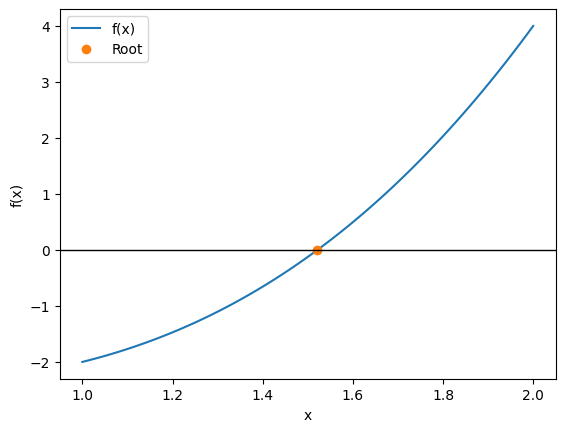

In [4]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(1, 2, 101)
Y = f(X)

plt.plot(X, Y, label="f(x)")
plt.plot(root, f(root), "o", label="Root")
plt.axhline(0, color="black", lw=1)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

The bisection method is the most robust way to refine a root by
repeatedly shrinking the search interval.
Because it is so basic, it is one of the algorithm explicitly required
by ASTR 513!

### Newton-Raphson Method

The Newton-Raphson Method is one of the most important and widely used
root-finding algorithms.

Unlike bisection, which only uses function values, Newton's method
leverages the derivative to achieve much faster convergence, but at a
cost of robustness.

Suppose we want to solve $f(x) = 0$.
Expand $f(x)$ around a current guess $x_n$ with a first-order Taylor
expansion:
\begin{align}
  f(x) \approx f(x_n) + f'(x_n)(x - x_n).
\end{align}

The root of this linear approximation occurs at:
\begin{align}
  x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}.
\end{align}

This is the Newton update rule.
It can also be seen as: "Draw the tangent line at $x_n$; where it
crosses the x-axis becomes $x_{n+1}$."

* Quadratic convergence:
  If the initial guess is close to the true root $x^*$, the error
  shrinks roughly like
  \begin{align}
    |x_{n+1}-x^*| \sim |x_n-x^*|^2,
  \end{align}
  meaning the number of correct digits roughly doubles at each step.

* Fragility:
  * If $f'(x_n)=0$, the method fails (division by zero).
  * If the initial guess is far from the root, the iteration may
    diverge or converge to the *wrong* root.

Thus, Newton's method is fast but fragile.

In [5]:
def newton(f, fp, x0, tol=1e-6, imax=100, history=False):

    X = [x0]
    for _ in range(imax):
        fn, fpn = f(X[-1]), fp(X[-1])
        if fpn == 0:
            raise ValueError("Derivative is zero: Newton step undefined.")
            
        X.append(X[-1] - fn/fpn)
        if abs(X[-1] - X[-2]) < tol:
            return np.array(X) if history else X[-1]

    msg = "Maximum iterations reached without convergence"
    if history:
        from warnings import warn
        warn(msg)
        return np.array(X)
    else:
        raise ValueError(msg)

Let's solve $f(x) = x^3 − x − 2$ again so $f'(x) = 3x^2 - 1$.

In [6]:
f  = lambda x:   x**3 - x - 2
fp = lambda x: 3*x**2 - 1

r  = newton(f, fp, x0=1)

print("Approximate root:", r)
print("f(root) =", f(r))

Approximate root: 1.5213797068045676
f(root) = 0.0


Text(0.5, 1.0, 'Newton–Raphson: tangent iteration')

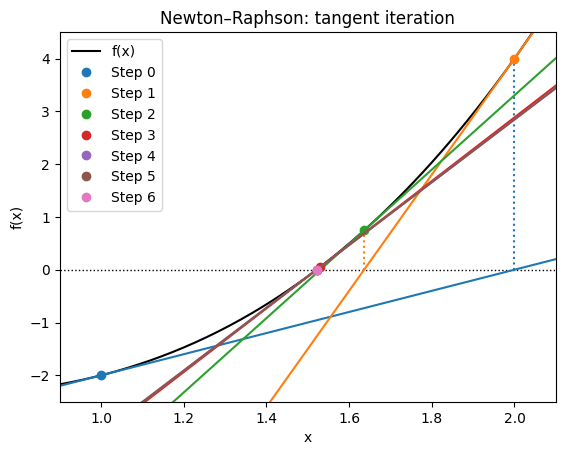

In [7]:
def tangent(f, fp, x0):
    m = fp(x0)
    return lambda x: f(x0) + m*(x - x0)

X = np.linspace(0.9, 2.1, 221)
Y = f(X)
R = newton(f, fp, 1, history=True)

plt.axhline(0, color="k", ls=":", lw=1)
plt.plot(X, Y, color="k", label="f(x)")

for n in range(len(R)-1):
    plt.plot(R[n], f(R[n]), "o", label=f"Step {n}", color=f"C{n}")
    plt.plot(X, tangent(f, fp, R[n])(X),            color=f"C{n}")
    plt.plot([R[n+1], R[n+1]], [0, f(R[n+1])], ":", color=f"C{n}")
plt.plot(R[-1], f(R[-1]), "o", label=f"Step {len(R)-1}", color=f"C{len(R)-1}")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.xlim(0.9, 2.1)
plt.ylim(-2.5, 4.5)
#plt.xlim( 1.5213, 1.5215)
#plt.ylim(-0.0005, 0.0005)
plt.legend()
plt.title("Newton–Raphson: tangent iteration")

Let's try different initial guesses:

In [8]:
for x0 in np.linspace(-5, 5, 11):
    try:
        R = newton(f, fp, x0, history=True)
        print(f"Start {x0:.2f} -> root {R[-1]:.6f} in {len(R)} steps")
    except Exception as e:
        print(f"Failed: {e}; History: {R}")

Start -5.00 -> root 1.521380 in 11 steps
Start -4.00 -> root 1.521380 in 20 steps
Start -3.00 -> root 1.521380 in 32 steps
Start -2.00 -> root 1.521380 in 31 steps
Start -1.00 -> root 1.521380 in 33 steps
Start 0.00 -> root 1.521380 in 32 steps
Start 1.00 -> root 1.521380 in 7 steps
Start 2.00 -> root 1.521380 in 6 steps
Start 3.00 -> root 1.521380 in 7 steps
Start 4.00 -> root 1.521380 in 8 steps
Start 5.00 -> root 1.521380 in 9 steps


Note that near the root 1.5, the convergence is very fast.
Starting at 0.0 took many more steps and almost fails because it
initially gives a poor direction.
The Newton-Raphson method may actually diverge.

In [9]:
# HANDSON: try to provide a f() (and hence fp()) and x0 so that
#          Newton-Raphson fails to converge.
# HINT:    try f(x) = cos(x) - x


### Newton-Raphson Method with Automatic Differentiation (by JAX)

Computing derivatives manually is tedious.
With JAX, we can define only $f(x)$ and let autodiff handle $f'(x)$.

In [10]:
import jax
jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp
from jax import grad, jit

def autonewton(f, x0, tol=1e-6, imax=100, history=False):

    fp = jit(grad(f))
    X  = [float(x0)]
    for _ in range(imax):
        fn, fpn = f(X[-1]), fp(X[-1])
        if fpn == 0:
            raise ValueError("Derivative is zero: Newton step undefined.")
            
        X.append(X[-1] - fn/fpn)
        if abs(X[-1] - X[-2]) < tol:
            return jnp.array(X) if history else X[-1]

    msg = "Maximum iterations reached without convergence"
    if history:
        from warnings import warn
        warn(msg)
        return jnp.array(X)
    else:
        raise ValueError(msg)

In [11]:
r = autonewton(f, x0=1)
print("Approximate root:", r)
print("f(root) =", f(r))

Approximate root: 1.5213797068045676
f(root) = 0.0


**Pros:**
extremely fast (quadratic convergence) when near the root.

**Cons:**
requires derivative (not really a problem with autodiff), can fail
with bad initial guess.

**Best practice:**
combine with a robust method (e.g. start with bisection, then switch
to Newton).

### Newton-Raphson Method for Nonlinear Systems

So far, we have solved single equations $f(x)=0$.
But in real applications, from orbital mechanics to stellar structure
modeling, we often need to solve systems of nonlinear equations:
\begin{align}
  \mathbf{f}(\mathbf{x}) =
  \begin{bmatrix}
  f_1(x_1, x_2, \dots, x_n) \\
  f_2(x_1, x_2, \dots, x_n) \\
  \vdots \\
  f_n(x_1, x_2, \dots, x_n)
  \end{bmatrix} = \mathbf{0}.
\end{align}

In multiple dimensions, we generalize Newton's method by using the
Jacobian matrix:
\begin{align}
  J(\mathbf{x}) =
  \begin{bmatrix}
  \frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \dots & \frac{\partial f_1}{\partial x_n} \\
  \frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \dots & \frac{\partial f_2}{\partial x_n} \\
  \vdots & \vdots & \ddots & \vdots \\
  \frac{\partial f_n}{\partial x_1} & \frac{\partial f_n}{\partial x_2} & \dots & \frac{\partial f_n}{\partial x_n}
  \end{bmatrix}.
\end{align}

At each iteration, we solve the linear system:
\begin{align}
  J(\mathbf{x}_n) \Delta \mathbf{x}_n = -\mathbf{f}(\mathbf{x}_n),
\end{align}
and update:
\begin{align}
  \mathbf{x}_{n+1} = \mathbf{x}_n + \Delta \mathbf{x}_n = \mathbf{x}_n - J(\mathbf{x}_n)^{-1} \mathbf{f}(\mathbf{x}_n).
\end{align}

This is the Newton–Raphson update for nonlinear systems.

In [12]:
def newton_system(F, J, X0, tol=1e-6, imax=100, history=False):

    X = [np.array(X0, dtype=float)]
    for _ in range(imax):
        Fn = F(X[-1])
        Jn = J(X[-1])
        dX = np.linalg.solve(Jn, -Fn) # let numpy raise exception

        X.append(X[-1] + dX)
        if np.max(abs(X[-1] - X[-2])) < tol:
            return np.array(X) if history else X[-1]

    msg = "Maximum iterations reached without convergence"
    if history:
        from warnings import warn
        warn(msg)
        return np.array(X)
    else:
        raise ValueError(msg)

Consider the system:
\begin{align}
  f_1(x,y) &= x^2 + y^2 - 4 = 0 \\
  f_2(x,y) &= e^x + y − 1 = 0
\end{align}

In [13]:
def F(X):
    x, y = X
    return np.array([
        x**2 + y**2 - 4,
        np.exp(x) + y - 1,
    ])

def J(X):
    x, y = X
    return np.array([
        [2*x,       2*y],
        [np.exp(x), 1.0],
    ])

X0   = [1.0, 1.0]
root = newton_system(F, J, X0)

print("Approximate root:", root)
print("F(root) =", F(root))

Approximate root: [-1.81626407  0.8373678 ]
F(root) = [3.81028542e-13 2.57571742e-14]


### Newton-Raphson Systems with Automatic Jacobian (by JAX)

In higher dimensions, computing derivatives by hand is even more
tedious.
We can use JAX autodiff to generate the Jacobian automatically.

In [14]:
from jax import jacfwd

In [15]:
def autonewton_system(F, X0, tol=1e-6, imax=100, history=False):

    J = jacfwd(F)
    X = [jnp.array(X0, dtype=float)]
    for _ in range(imax):
        Fn = F(X[-1])
        Jn = J(X[-1])
        dX = np.linalg.solve(Jn, -Fn) # let numpy raise exception

        X.append(X[-1] + dX)
        if np.max(abs(X[-1] - X[-2])) < tol:
            return jnp.array(X) if history else X[-1]

    msg = "Maximum iterations reached without convergence"
    if history:
        from warnings import warn
        warn(msg)
        return jnp.array(X)
    else:
        raise ValueError(msg)

In [16]:
def F(X):
    x, y = X
    return jnp.array([
        x**2 + y**2 - 4,
        jnp.exp(x) + y - 1,
    ])

X0 = [1.0, 1.0]
R  = autonewton_system(F, X0)

print("Approximate root:", R)
print("F(root) =", F(R))

Approximate root: [-1.81626407  0.8373678 ]
F(root) = [3.81028542e-13 2.57571742e-14]


**Pros:**
* Quadratic convergence in multiple dimensions.
* Works naturally with systems of equations.

**Cons:**
* Requires solving a linear system at each step (costly for large
  $n$).
* Fragile if the Jacobian is singular or if the initial guess is poor.

In [17]:
# HANDSON: Try modifying the system of equations to:
#          
#              f1(x,y) = sin(x) + y**2 - 1
#              f2(x,y) = x**2 - y - 1
#
#          Use both the hand-coded Jacobian and JAX autodiff.
#          How many iterations are needed to converge from an initial
#          guess [0.5, 0.5]?


## Optimization Methods

We now turn from root finding to optimization.

At first, these may seem like different problems:
* Root finding:
  Solve $f(x) = 0$.
* Optimization:
  Find $x^*$ that minimizes (or maximizes) $f(x)$.

But they are deeply connected.
A critical point of a differentiable function occurs when the gradient
vanishes:
\begin{align}
  \nabla f(x^*) = 0.
\end{align}
Thus, optimization can often be reformulated as root finding on the
gradient.

Some applications in astrophysics include:
* The principle of least action states that nature chooses
  trajectories that extremize the action.
* Fitting a model to data often requires minimizing a chi-square error
  function.
* Training a neural network to classify galaxies is an optimization
  problem, i.e., minimizing a loss function over millions of
  parameters.

### Gradient Descent in One Dimension

The most basic optimization algorithm is **Gradient Descent**.
It is simple, intuitive, and forms the foundation of modern
optimization in high dimensions.

Suppose we want to minimize a differentiable function $f(x)$.
* The derivative $f'(x)$ points in the direction of steepest ascent.
* Moving in the opposite direction reduces $f(x)$.

The update rule is:
\begin{align}
  x_{n+1} = x_n - \alpha f'(x_n),
\end{align}
where $\alpha > 0$ is the "learning rate" or "step size".

In [18]:
def gd(fp, x0, alpha, tol=1e-6, imax=100, history=False):

    X = [float(x0)]
    for _ in range(imax):
        X.append(X[-1] - alpha * fp(X[-1]))            
        if abs(X[-1] - X[-2]) < tol:
            return np.array(X) if history else X[-1]

    msg = "Maximum iterations reached without convergence"
    if history:
        from warnings import warn
        warn(msg)
        return np.array(X)
    else:
        raise ValueError(msg)

Let's consider:
\begin{align}
  f(x) = (x-3)^2 + 4,
\end{align}
which has a unique minimum at $x=3$.
The derivative is:
\begin{align}
  f'(x) = 2(x-3).
\end{align}

In [19]:
f  = lambda x:   (x-3)**2 + 4
fp = lambda x: 2*(x-3)

In [20]:
x0    = 0.0
alpha = 0.1
Xmin  = gd(fp, x0, alpha, history=True)

print("Approximate minimum:", Xmin[-1])
print("f(xmin) =", f(Xmin[-1]))

Approximate minimum: 2.9999963220107015
f(xmin) = 4.000000000013528


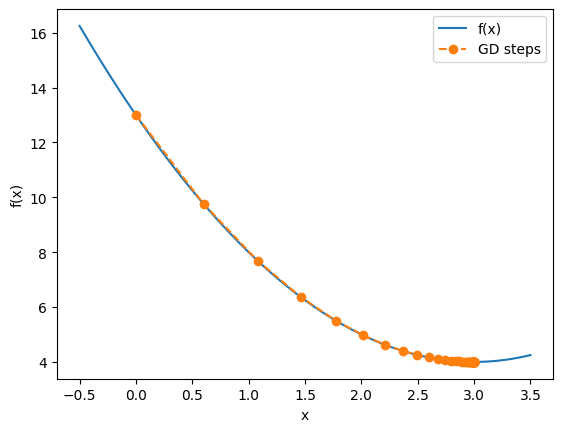

In [21]:
X = np.linspace(-0.5, 3.5, 401)
Y = f(X)

plt.plot(X, Y, label="f(x)")
plt.plot(Xmin, f(Xmin), "o--", label="GD steps")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

In [22]:
# HANDSON: Change `x0` and `alpha` and monitor how many steps are
#          needed to obtain the solution.
#          What is the optimal choice of `alpha`?
# NOTE:    You may need to adjust the axis limits.


From the hands-on, we saw:
* If $\alpha$ is too small, convergence is very slow.
* If $\alpha$ is too large, the algorithm may overshoot and even
  diverge.
* With a well-chosen $\alpha$, the iteration converges smoothly to the
  minimum.

This trade-off between stability and speed is central to all
gradient-based optimization.

Compared gradient descent with Newton-Raphson method, there are few
interesting observations:

* Newton-Raphson requires function evaluation $f(x)$ but not learning
  rate $\alpha$.
  Gradient descent is the opposite.

* Both of them use fix point iterations:
  \begin{align}
    x_{n+1} = x_n -
    \begin{cases}
      f(x_n) / f'(x_n) & \text{(Newton-Raphson)} \\
      \alpha f'(x_n)   & \text{(Gradient descent)}
    \end{cases}
  \end{align}

* If we consider gradient descent as root finding for $g(x) = f'(x)$,
  then Newton-Raphson becomes
  \begin{align}
    x_{n+1} &= x_n - g(x_n) / g'(x_n) \\
            &= x_n - f'(x_n) / f''(x_n)
  \end{align}
  Comparing this to gradient descent, we have $\alpha = 1/f''(x_n)$,
  which makes sense because $f''(x_n) > 0$ only when $x_n$ is near its
  minimum.

* If we consider $h(x) = f(x)^2$ so $h'(x) = 2 f(x) f'(x)$, then
  gradient descent becomes
  \begin{align}
    x_{n+1} &= x_n - \alpha h'(x_n) \\
            &= x_n - 2 \alpha f(x_n) f'(x_n)
  \end{align}
  Comparing this to Newton-Raphson, we have $\alpha = 1/2[f'(x_n)]^2$.

Although gradient descent only needs $f'(x)$ but not $f(x)$, very
often $f(x)$ still take a simplier form to write.
In such a case, using autodiff can be handly.

In [23]:
def autogd(f, x0, alpha, tol=1e-6, imax=100, history=False):

    fp = jit(grad(f))
    X  = [float(x0)]
    for _ in range(imax):
        X.append(X[-1] - alpha * fp(X[-1]))            
        if abs(X[-1] - X[-2]) < tol:
            return jnp.array(X) if history else X[-1]

    msg = "Maximum iterations reached without convergence"
    if history:
        from warnings import warn
        warn(msg)
        return jnp.array(X)
    else:
        raise ValueError(msg)

In [24]:
x0    = 0.0
alpha = 0.1
Xmin  = autogd(f, x0, alpha, history=True)

print("Approximate minimum:", Xmin[-1])
print("f(xmin) =", f(Xmin[-1]))

Approximate minimum: 2.9999963220107015
f(xmin) = 4.000000000013528


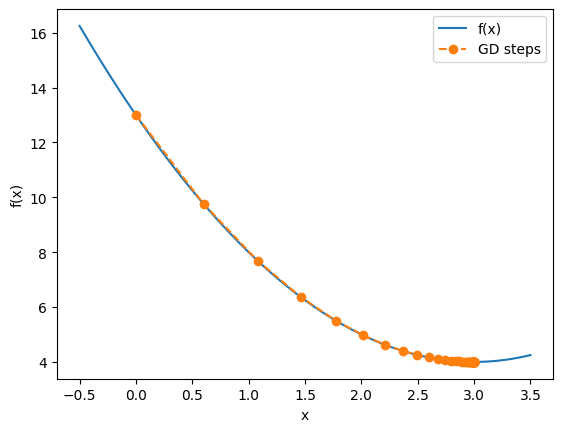

In [25]:
X = np.linspace(-0.5, 3.5, 401)
Y = f(X)

plt.plot(X, Y, label="f(x)")
plt.plot(Xmin, f(Xmin), "o--", label="GD steps")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

In [26]:
# HANDSON: solve a root finding problem using gradient descent.
#          Does it work better or worse?


In [27]:
# HANDSON: solve a minimization problem using root finding.
#          Does it work better or worse?


### Gradient Descent in Multiple Dimensions

Most optimization problems in science and engineering are
multidimensional.
I.e., we need to minimize a function of several variables:
\begin{align}
  f(\mathbf{x}), \quad \mathbf{x} = (x_1, x_2, \dots, x_n).
\end{align}

Gradient descent naturally general to these problems because the
gradient vector still points in the direction of steepest ascent.

Again, to minimize $f$, we simply move in the opposite direction:
\begin{align}
  \mathbf{x}_{n+1} = \mathbf{x}_n - \alpha \nabla f(\mathbf{x}_n),
\end{align}
where $\alpha > 0$ is the learning rate.

In fact, for multidimensional problems, very often $f(\mathbf{x}$ has
a simplier form than $\nabla f(\mathbf{x})$.
Let's update our `autodg()` for multidimensional problems then:

In [28]:
def autogd(f, X0, alpha, tol=1e-6, imax=100, history=False):

    Gf = jit(grad(f))
    X  = [jnp.array(X0, dtype=float)]
    for _ in range(imax):
        X.append(X[-1] - alpha * Gf(X[-1]))            
        if np.max(abs(X[-1] - X[-2])) < tol:
            return jnp.array(X) if history else X[-1]

    msg = "Maximum iterations reached without convergence"
    if history:
        from warnings import warn
        warn(msg)
        return jnp.array(X)
    else:
        raise ValueError(msg)

Consider a simple quadratic bowl:
\begin{align}
  f(x,y) = (x - 3)^2 + 2(y + 4)^2,
\end{align}
which has a unique minimum at $(x,y) = (3, -4)$.
This function is smooth, convex, and easy to visualize.

In [29]:
# Define the function
def f(X):
    x, y = X
    return (x - 3)**2 + 2*(y + 4)**2

In [30]:
X0    = [0.0, 0.0]  # initial guess
alpha = 0.1         # learning rate

Xmin = autogd(f, X0, alpha, history=True)

In [31]:
print("Approximate minimum:", Xmin[-1])
print("f(xmin) =", f(Xmin[-1]))

Approximate minimum: [ 2.99999632 -4.        ]
f(xmin) = 1.3527605279558334e-11


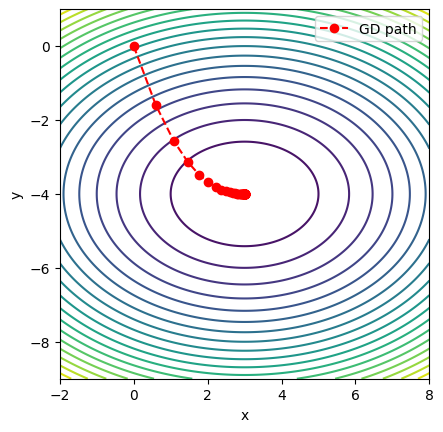

In [32]:
X    = np.linspace(-2, 8, 201)
Y    = np.linspace(-9, 1, 201)
X, Y = np.meshgrid(X, Y)
Z    = f((X, Y))

plt.contour(X, Y, Z, levels=20)

plt.plot(Xmin[:,0], Xmin[:,1], "ro--", label="GD path")

plt.gca().set_aspect("equal")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

We can also track the loss function (objective value) as a function of
iteration:

Text(0.5, 1.0, 'Convergence of Gradient Descent')

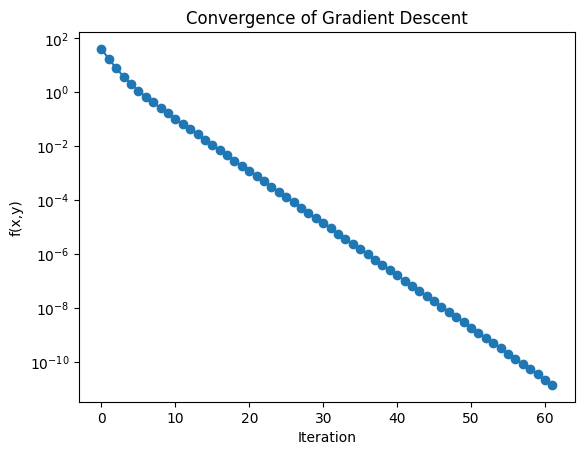

In [33]:
L = [f(X) for X in Xmin]

plt.semilogy(L, "o-")
plt.xlabel("Iteration")
plt.ylabel("f(x,y)")
plt.title("Convergence of Gradient Descent")

This 2D example illustrates how gradient descent generalizes naturally
from 1D.
In practice, astrophysics and machine learning involve thousands or
millions of parameters.
The same principle applies: take small steps downhill, guided by the
gradient.

In [34]:
# HANDSON: try using gradient descent on more complicated functions.


### Stochastic Gradient Descent (SGD)

Simple gradient descent works well for simple functions.
But in practice, especially in machine learning and large-scale
astrophysical modeling, we often minimize functions defined as
averages over huge datasets:
\begin{align}
  f(\theta) = \frac{1}{N} \sum_{i=1}^N L(\theta; x_i),
\end{align}
where:
* $\theta$ are the model parameters,
* $L(\theta; x_i)$ is the loss for a single data point,
* $N$ is the dataset size (millions or more).

Computing the full gradient $\nabla f$ requires looping over all $N$
points each step, which can be very slow.

Instead of using all data points at each step, the idea of stochastic
gradient descent (SGC) is to approximate the gradient using a random
subset (i.e., a mini-batch):
\begin{align}
  \nabla f(\theta) \approx \frac{1}{B} \sum_{i \in \text{batch}} \nabla L(\theta; x_i),
\end{align}
where $B \ll N$.
This reduces computation per step and introduces randomness that can
help escape local minima.

To develop a SGC algorithm, it is useful to start with an example.
Let's generate noisy data from a degree-6 polynomial, then fit it by
minimizing the mean squared error with SGD.

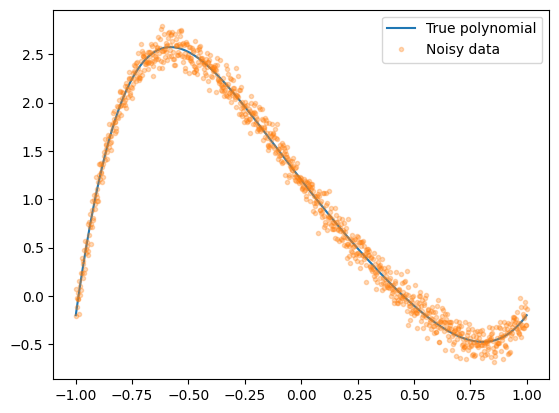

In [35]:
Ptrue = np.array([1.2, -3, 0.5, 1.0, -1.8, 2.0, -0.1])
Xdata = np.linspace(-1, 1, 1000)
Ytrue = sum(c * Xdata**i for i, c in enumerate(Ptrue))
Ydata = Ytrue + np.random.normal(scale=0.1, size=Xdata.shape)

plt.plot(Xdata, Ytrue,                 label="True polynomial")
plt.plot(Xdata, Ydata, ".", alpha=0.3, label="Noisy data")
plt.legend()

Next, let's define model and loss function.

In [36]:
def model(P, X):
    return sum(c * X**i for i, c in enumerate(P))

def mse(P, X, Y):
    return jnp.mean((model(P, X) - Y)**2)

And then modify our `autogd()` function to become `sgd()`.
The usual applications of SGD have many parameters.
It is unlikely that we will provide gradient manually.
Let's just drop the `auto` in its name.

In [37]:
from tqdm import tqdm

def sgd(f, P0, X, Y, alpha, B=10, tol=1e-6, imax=100, history=False):

    assert len(X) == len(Y)
    
    Gf = jit(grad(f))
    N  = len(X)
    P  = [jnp.array(P0, dtype=float)]
    for _ in tqdm(range(imax)):

        # Random mini-batch
        I = np.random.choice(N, N//B, replace=False)
        Xb, Yb = X[I], Y[I]
        
        P.append(P[-1] - alpha * Gf(P[-1], Xb, Yb))
        if np.max(abs(P[-1] - P[-2])) < tol:
            return jnp.array(P) if history else P[-1]

    msg = "Maximum iterations reached without convergence"
    if history:
        from warnings import warn
        warn(msg)
        return jnp.array(P)
    else:
        raise ValueError(msg)

In [38]:
P0    = jnp.zeros(len(Ptrue))  # initial guess
alpha = 0.1
B     = 100

P = sgd(mse, P0, Xdata, Ydata, alpha, B=B, tol=1e-3, imax=1000, history=True)

print("Final coefficients (SGD):", P[-1])
print("True coefficients:", Ptrue)

 53%|████████████████████▋                  | 532/1000 [00:00<00:00, 697.48it/s]

Final coefficients (SGD): [ 1.25281536 -2.94518085 -0.12024169  0.98787108 -0.59063657  1.91408584
 -0.70557072]
True coefficients: [ 1.2 -3.   0.5  1.  -1.8  2.  -0.1]


Before looking at the fit, we can look at the loss function, which is
just the MSE.

Text(0.5, 1.0, 'SGD Convergence')

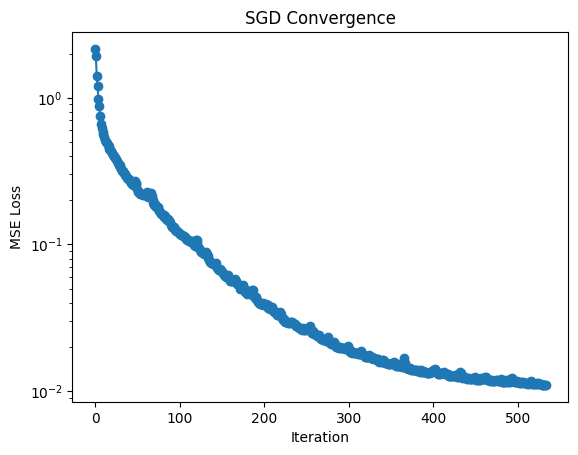

In [39]:
L = [mse(Pn, Xdata, Ydata) for Pn in P]

plt.semilogy(L, "o-")
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("SGD Convergence")

We can now plot the fit.

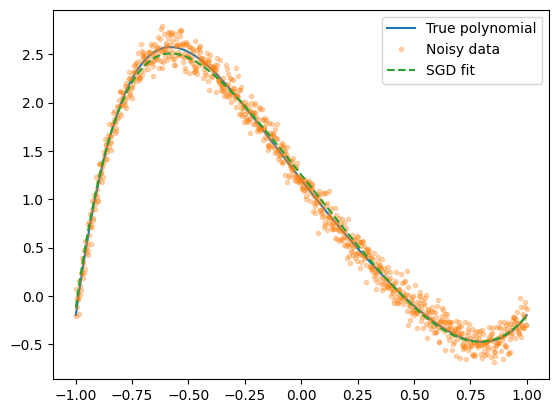

In [40]:
Yfit = model(P[-1], Xdata)

plt.plot(Xdata, Ytrue,                 label="True polynomial")
plt.plot(Xdata, Ydata, ".", alpha=0.3, label="Noisy data")
plt.plot(Xdata, Yfit,  "--",           label="SGD fit")
plt.legend()

In [41]:
# HANDSON: try different number of batch and study the convergence
#          properties of SGD.


In [42]:
# HANDSON: use `%timeit` to check performance.
#          Do you get the answer faster if you set B=1 but use less
#          number of iteration?


**Pros:**
* Much faster per step for large datasets.
* Handles huge data by working with small batches.
* Noise in updates can help escape local minima.

**Cons:**
* More noisy convergence compared to full-batch gradient descent.
* Requires tuning of batch size and learning rate.
* Often combined with enhancements (e.g., momentum, Adam optimizer).

### The Adam Optimizer

SGD is powerful but has limitations:
* Sensitive to the choice of learning rate.
* Convergence can be slow if the landscape is poorly scaled.
* Updates can oscillate in narrow valleys of the loss function.

The Adam (Adaptive Moment Estimation) optimizer improves on SGD by
combining two ideas:
1. Momentum:
   Smooth the updates by averaging past gradients.
2. Adaptive Learning Rates:
   Scale each parameter's step size individually based on gradient
   magnitudes.

Introduced by [Kingma & Ba (2014)](https://arxiv.org/abs/1412.6980),
Adam has become the default optimizer in machine learning.

At each step $n$:

1. Compute gradient:
   \begin{align}
     g_n = \nabla f(\theta_n).
   \end{align}

2. Update biased first moment (exponential moving average of
   gradients):
   \begin{align}
     m_n = \beta_1 m_{n-1} + (1-\beta_1) g_n.
   \end{align}

3. Update biased second moment (exponential moving average of squared
   gradients):
   \begin{align}
     v_n = \beta_2 v_{n-1} + (1-\beta_2) g_n^2.
   \end{align}

4. Apply bias correction:
   \begin{align}
     \hat{m}_n = \frac{m_n}{1 - \beta_1^n}, \qquad
     \hat{v}_n = \frac{v_n}{1 - \beta_2^n}.
   \end{align}

5. Update parameters:
   \begin{align}
     \theta_{n+1} = \theta_n - \alpha \frac{\hat{m}_n}{\sqrt{\hat{v}_n} + \epsilon}.
   \end{align}

Default parameters:
$\beta_1 = 0.9$, $\beta_2 = 0.999$, $\epsilon = 10^{-8}$.


In [43]:
def adam(f, P0, X, Y, alpha,
         beta1=0.9, beta2=0.999, epsilon=1e-8, B=10,
         tol=1e-6, imax=100, history=False):

    assert len(X) == len(Y)
    
    Gf = jit(grad(f))
    N  = len(X)
    
    P  = [jnp.array(P0, dtype=float)]
    M, V = 0, 0
    for n in tqdm(range(imax)):

        # Random mini-batch
        I = np.random.choice(N, N//B, replace=False)
        Xb, Yb = X[I], Y[i]

        # Adam algorithm
        G  = Gf(P[-1], X, Y)
        M  = beta1 * M + (1 - beta1) * G
        V  = beta2 * V + (1 - beta2) * G*G
        Mh = M / (1 - beta1**(n+1))
        Vh = V / (1 - beta2**(n+1))
        
        P.append(P[-1] - alpha * Mh / (jnp.sqrt(Vh) + epsilon))
        if np.max(abs(P[-1] - P[-2])) < tol:
            return jnp.array(P) if history else P[-1]

    msg = "Maximum iterations reached without convergence"
    if history:
        from warnings import warn
        warn(msg)
        return jnp.array(P)
    else:
        raise ValueError(msg)

In [44]:
P0    = jnp.zeros(len(Ptrue))  # initial guess
alpha = 0.1
B     = 100

P = adam(mse, P0, Xdata, Ydata, alpha, B=B, tol=1e-3, imax=500, history=True)

print("Final coefficients (Adam):", P[-1])
print("True coefficients:", Ptrue)

 27%|██████████▊                             | 135/500 [00:00<00:01, 223.56it/s]

Final coefficients (Adam): [ 1.21726515 -2.90937222  0.10441762  0.63294315 -0.67205546  2.30960501
 -0.89512215]
True coefficients: [ 1.2 -3.   0.5  1.  -1.8  2.  -0.1]


Text(0.5, 1.0, 'Adam Convergence')

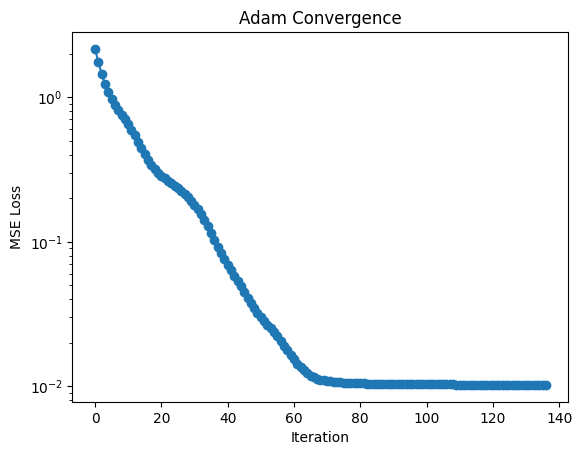

In [45]:
L = [mse(Pn, Xdata, Ydata) for Pn in P]

plt.semilogy(L, "o-")
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Adam Convergence")

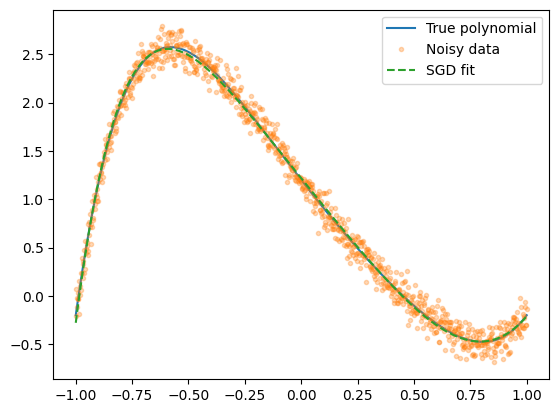

In [46]:
Yfit = model(P[-1], Xdata)

plt.plot(Xdata, Ytrue,                 label="True polynomial")
plt.plot(Xdata, Ydata, ".", alpha=0.3, label="Noisy data")
plt.plot(Xdata, Yfit,  "--",           label="SGD fit")
plt.legend()

In [47]:
# HANDSON: try different number of batch and study the convergence
#          properties of Adam.


In [48]:
# HANDSON: use `%timeit` to check performance.
#          Do you get the answer faster if you set B=1 but use less
#          number of iteration?


**Pros**:
* Adapts learning rates automatically.
* Handles noisy or sparse gradients well.
* Faster and more stable than plain SGD in practice.

**Cons**:
* Can sometimes fail to converge to the true minimum
  (over-adaptation).
* Still requires some hyperparameter tuning.
* Despite this, Adam is often the go-to optimizer in deep learning and
  large-scale scientific applications.